# **`pycoco`** calling **`CoCo`**

___

## Introduction

---
**`pycoco.coco_calls`**

In [1]:
try:
    from importlib import reload
except:
    pass

# %matplotlib inline
%matplotlib notebook

from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# Run Light Curve Fits
___
## Individual SNe
First test

In [2]:
snname = "SN2006aj"
pcc.coco.run_LCfit(snname)

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on SN2006aj
callargs are  ['/Users/berto/Code/CoCo/lcfit', 'SN2006aj']
Fit complete


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/utils.py:216: UserWarning: /Users/berto/Code/verbose-enigma/notebooks/Tutorials/SN2006aj is not a valid file. Returning 'False'.
  " is not a valid file. Returning 'False'.")


Then run

In [3]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"))

current list.txt is up to date. re run with force = True to force.
No Model supplied - running with default
Running CoCo lcfit on /Users/berto/Code/CoCo//data/lc/SN2006aj.dat
callargs are  ['/Users/berto/Code/CoCo/lcfit', '/Users/berto/Code/CoCo//data/lc/SN2006aj.dat']
Fit complete


In [ ]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

In [ ]:
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model="Karpenka12")

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


<IPython.core.display.Javascript object>


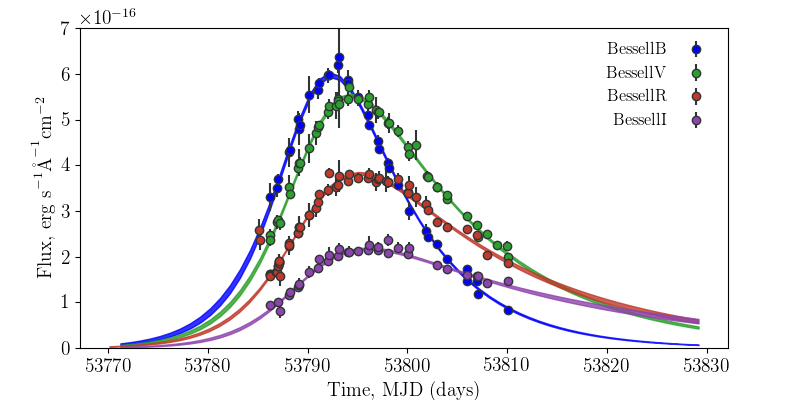

In [4]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## Model Choice
----
You can also pass a model to **`CoCo lcfit`**, this is possible through **`pycoco`** using the `model` arg. This will only take models that are defined in CoCo/src/models and match the filenames. So, currently the valid models are:

In [ ]:
models = np.unique([i.split(".")[0] for i in os.listdir(os.path.join(pcc.defaults._default_coco_dir_path, "src/models"))])
models

In [ ]:
model_name = "Karpenka12"
# model_name = "Karpenka12Afterglow"
# model_name = "Kessler10"
pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model=model_name, verbose=True)

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


<IPython.core.display.Javascript object>


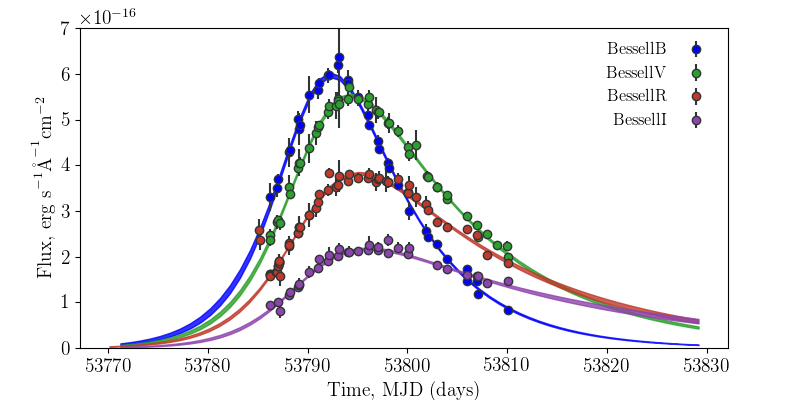

In [5]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

## All SNe as Batch
___

In [ ]:
pcc.coco.run_LCfit_fileinput(os.path.join(pcc.defaults._default_coco_dir_path, "examples/lc.list"))
print("Done.")

## Call Specfit
---

### individual speclists

In [ ]:
pcc.coco.get_all_spec_lists()

In [18]:
sn.load_list(path=os.path.join(pcc.defaults._default_list_dir_path, sn.name+".list"))
sn.load_spec()

# sn.load_mangledspec()
sn.load_reconspec()
sn.load_simspec()


In [19]:
path_to_filter = os.path.join(pcc.defaults._default_filter_dir_path,"BessellB.dat")
BessellB = pcc.classes.FilterClass()
BessellB.read_filter_file(path_to_filter)
BessellB.calculate_AB_zp()

sim_spec_flux = []
sim_mjd_obs = []

for spec in sn.sim_spec:
    print(spec)
    flux = pcc.kcorr.calc_spectrum_filter_flux(filter_object=BessellB, spectrum_object=sn.sim_spec[spec])
    mjd_obs = float(spec.split("_")[-1])
    
    sim_spec_flux.append(flux)
    sim_mjd_obs.append(mjd_obs)

SN2006aj_53786.270000
filter =  BessellB
min wavelength =  1500.44922166
max wavelength =  24759.6449687
resampling the response
min wavelength =  3540.3
max wavelength =  7272.03
Filter_area =  958.900271264
Integrated flux =  65.4066898055
SN2006aj_53787.230000
filter =  BessellB
min wavelength =  3540.3
max wavelength =  7272.03
resampling the response
min wavelength =  4263.57
max wavelength =  9633.22
Filter_area =  583.176851915
Integrated flux =  41.0678199018
SN2006aj_53788.200000
filter =  BessellB
min wavelength =  4263.57
max wavelength =  9633.22
resampling the response
min wavelength =  3386.88
max wavelength =  9676.79
Filter_area =  958.901772145
Integrated flux =  91.3501374493
SN2006aj_53789.170000
filter =  BessellB
min wavelength =  3386.88
max wavelength =  9676.79
resampling the response
min wavelength =  3388.16
max wavelength =  9341.84
Filter_area =  958.904587177
Integrated flux =  103.24848913
SN2006aj_53790.140000
filter =  BessellB
min wavelength =  3388.16


/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


<IPython.core.display.Javascript object>


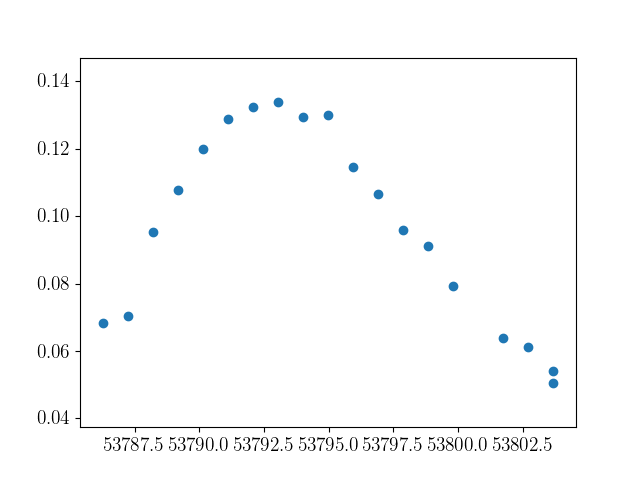

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(sim_mjd_obs, sim_spec_flux)


In [9]:
# pcc.coco.run_specfit('/Users/berto/Code/CoCo/lists/SN2013ge.list')
pcc.coco.run_specfit(SNObject=sn, overwrite=True)

hasattr spec and lcfit
2006aj_-7.93.txt <pycoco.classes.SpectrumClass object at 0x116f19da0>
filter =  BessellB
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  958.621239806
Integrated flux =  2.38852505349e-14
filter =  BessellB
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  958.621239806
Integrated flux =  2.38852505349e-14
filter =  BessellI
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  218.735521069
Integrated flux =  1.45120651752e-15
filter =  BessellI
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  218.735521069
Integrated flux =  1.45120651752e-15
filter =  BessellR
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  1423.6721297
Integrated flux =  1.47359725284e-14
filter =  BessellR
min wavelength =  3658.54602
max wavelength =  7514.9158
Filter_area =  1423.6721297
Integrated flux =  1.47359725284e-14
filter =  BessellV
min wavelength =  3658.54602
max wavel

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.14-py3.6.egg/pycoco/classes.py:1358: UserWarning: nothing to revert to
  warnings.warn("nothing to revert to")


filter =  BessellB
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  446.152651594
Integrated flux =  1.26634040847e-14
filter =  BessellB
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  446.152651594
Integrated flux =  1.26634040847e-14
filter =  BessellI
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1441.3680877
Integrated flux =  1.54851752597e-14
filter =  BessellI
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1441.3680877
Integrated flux =  1.54851752597e-14
filter =  BessellR
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1583.64821019
Integrated flux =  2.84183565257e-14
filter =  BessellR
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  1583.64821019
Integrated flux =  2.84183565257e-14
filter =  BessellV
min wavelength =  4405.97324
max wavelength =  9954.96955
Filter_area =  893.740699145
Integrated flux =  2.33124971209e-14
f

SN2006aj_53789.170000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53789.170000.spec
2006aj_-4.06.txt <pycoco.classes.SpectrumClass object at 0x116f2eba8>
filter =  BessellB
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  958.899970444
Integrated flux =  1.98601734065e-14
filter =  BessellB
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  958.899970444
Integrated flux =  1.98601734065e-14
filter =  BessellI
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  135.403493221
Integrated flux =  1.05152553074e-15
filter =  BessellI
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  135.403493221
Integrated flux =  1.05152553074e-15
filter =  BessellR
min wavelength =  3496.00253
max wavelength =  7418.89227
Filter_area =  1388.46763606
Integrated flux =  1.48879920092e-14
filter =  BessellR
min wavelength =  3496.00253


SN2006aj_53792.070000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53792.070000.spec
2006aj_-1.16.txt <pycoco.classes.SpectrumClass object at 0x117858d30>
filter =  BessellB
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  958.84538574
Integrated flux =  2.05098585274e-14
filter =  BessellB
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  958.84538574
Integrated flux =  2.05098585274e-14
filter =  BessellI
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  1441.60069518
Integrated flux =  8.45531834388e-15
filter =  BessellI
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  1441.60069518
Integrated flux =  8.45531834388e-15
filter =  BessellR
min wavelength =  3521.21749
max wavelength =  8904.95248
Filter_area =  1583.9453729
Integrated flux =  2.0664695532e-14
filter =  BessellR
min wavelength =  3521.21749
max 

SN2006aj_53794.970000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53794.970000.spec
2006aj_1.74.txt <pycoco.classes.SpectrumClass object at 0x116f2e588>
filter =  BessellB
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  958.835595727
Integrated flux =  1.97185119209e-14
filter =  BessellB
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  958.835595727
Integrated flux =  1.97185119209e-14
filter =  BessellI
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  1441.16389984
Integrated flux =  1.61874925715e-14
filter =  BessellI
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  1441.16389984
Integrated flux =  1.61874925715e-14
filter =  BessellR
min wavelength =  3500.55983
max wavelength =  9668.23205
Filter_area =  1583.91644137
Integrated flux =  2.78836380958e-14
filter =  BessellR
min wavelength =  3500.55983
m

SN2006aj_53797.880000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53797.880000.spec
2006aj_4.64.txt <pycoco.classes.SpectrumClass object at 0x116fa59e8>
filter =  BessellB
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  958.848690632
Integrated flux =  1.04053698945e-14
filter =  BessellB
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  958.848690632
Integrated flux =  1.04053698945e-14
filter =  BessellI
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  1269.36781531
Integrated flux =  1.41201644427e-14
filter =  BessellI
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  1269.36781531
Integrated flux =  1.41201644427e-14
filter =  BessellR
min wavelength =  3500.28081
max wavelength =  8598.81806
Filter_area =  1583.32153347
Integrated flux =  3.10554495306e-14
filter =  BessellR
min wavelength =  3500.28081
m

SN2006aj_53801.750000.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53801.750000.spec
2006aj_8.52.txt <pycoco.classes.SpectrumClass object at 0x116fa5080>
filter =  BessellB
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  958.871298971
Integrated flux =  7.87805026587e-15
filter =  BessellB
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  958.871298971
Integrated flux =  7.87805026587e-15
filter =  BessellI
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  1441.37419464
Integrated flux =  1.62840077668e-14
filter =  BessellI
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  1441.37419464
Integrated flux =  1.62840077668e-14
filter =  BessellR
min wavelength =  3521.8892
max wavelength =  8903.17503
Filter_area =  1583.62180411
Integrated flux =  3.19902663469e-14
filter =  BessellR
min wavelength =  3521.8892
max wav

SN2006aj_53803.680001.spec
has data
No directory specified, assuming /Users/berto/Code/CoCo/recon/
Overwriting /Users/berto/Code/CoCo/recon/SN2006aj_53803.680001.spec


## All Speclists
___

In [ ]:
pcc.coco.specfit_all()

# Specphase

In [17]:
phase_path = os.path.join(pcc.defaults._default_coco_dir_path, "examples/phase.list")
pcc.coco.run_specphase("BessellV", phase_path)

No Model supplied - running with default
Checking SN1993J... Found.
Checking SN1994I... Found.
Checking SN1996cb... Found.
Checking SN1998bw... Found.
Checking SN1999dn... Found.
Checking SN2002ap... Found.
Checking SN2003jd... Found.
Checking SN2004aw... Found.
Checking SN2005bf... Found.
Checking SN2005hg... Found.
Checking SN2006aj... Found.
Checking SN2007C... Found.
Checking SN2007Y... Found.
Checking SN2007gr... Found.
Checking SN2007uy... Found.
Checking SN2008D... Found.
Checking SN2008ax... Found.
Checking SN2008bo... Found.
Checking SN2009bb... Found.
Checking SN2009er... Found.
Checking SN2009iz... Found.
Checking SN2009jf... Found.
Checking SN2010al... Found.
Checking SN2010as... Found.
Checking SN2011bm... Found.
Checking SN2011dh... Found.
Checking SN2011ei... Found.
Checking SN2011fu... Found.
Checking SN2012ap... Found.
Checking SN2013ge... Found.
Checking SN2015U... Found.
Checking iPTF13bvn... Found.
current list.txt is up to date. re run with force = True to force.
[

In [ ]:
pcc.coco.run_specphase("BessellV", phase_path, model="Foo")

In [16]:
pcc.coco.run_specphase("BessellV", phase_path, model="Bazin09")

NameError: name 'phase_path' is not defined